In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


C:\Users\parin\AppData\Local\Temp\ipykernel_18972\4072110899.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
df = pd.read_csv("D:\\Semester 2\\Machine learning\\Project\\train.csv")

In [32]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [3]:
df.shape

(20800, 5)

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df = df.fillna('')

#### Feature Engineering

In [7]:
df['content'] = df['author']+' '+df['title']
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

In [8]:
p = PorterStemmer()

In [9]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [p.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [11]:
df['content'] = df['content'].fillna('').astype(str)

In [12]:
df['content'] = df['content'].apply(stemming)

In [13]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


#### Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['content'] = le.fit_transform(df['content'])
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,5361
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,5131
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,4671
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,10089
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,8346


In [15]:
X = df.drop(columns = ['label', 'id', 'title','author', 'text'], axis=1)
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.4933293269230769


In [20]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.49591346153846155


#### Comparing various models

In [21]:
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [22]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       #'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.496 (+/- 0.005) [Logistic Regression]
Test Accuracy: 0.4959 
Train CV Accuracy: 0.932 (+/- 0.003) [Random Forest]
Test Accuracy: 0.9313 
Train CV Accuracy: 0.917 (+/- 0.003) [KNeighbors]
Test Accuracy: 0.9255 
Train CV Accuracy: 0.932 (+/- 0.003) [Decision Tree]
Test Accuracy: 0.9315 
Train CV Accuracy: 0.688 (+/- 0.010) [Ada Boost]
Test Accuracy: 0.6913 
Train CV Accuracy: 0.932 (+/- 0.003) [Bagging]
Test Accuracy: 0.9315 
Train CV Accuracy: 0.752 (+/- 0.010) [Gradient Boosting]
Test Accuracy: 0.7411 
Train CV Accuracy: 0.753 (+/- 0.005) [XGBoost]
Test Accuracy: 0.7546 
CPU times: total: 18.6 s
Wall time: 1min 11s


#### Data Visualization

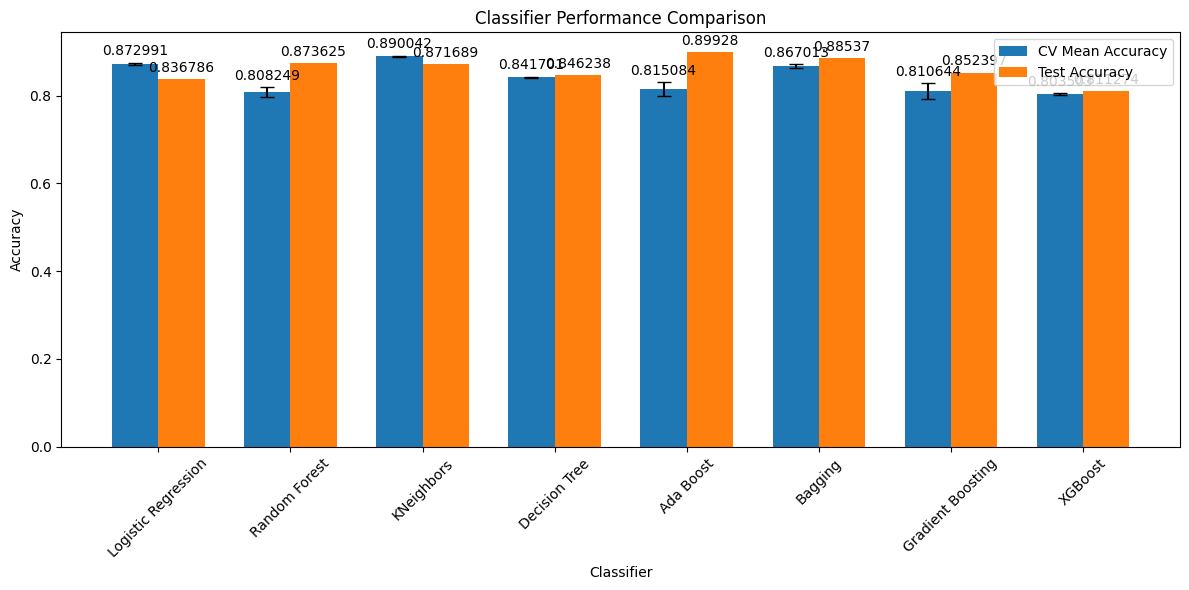

In [33]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Logistic Regression', 'Random Forest', 'KNeighbors', 'Decision Tree',
          'Ada Boost', 'Bagging', 'Gradient Boosting', 'XGBoost']
cv_means = np.random.rand(8) * 0.1 + 0.8
cv_stds = np.random.rand(8) * 0.02
test_accuracies = np.random.rand(8) * 0.1 + 0.8

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, cv_means, width, label='CV Mean Accuracy', yerr=cv_stds, capsize=5)
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

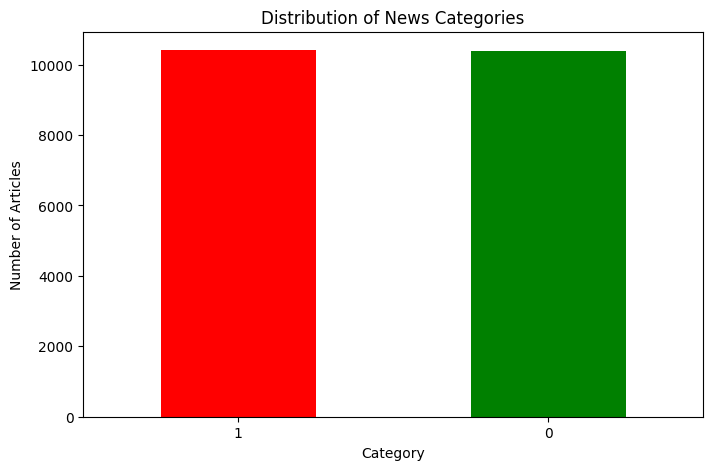

In [ ]:
category_counts = df['label'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

#### Since the accuracy of Logistic Regression is very low as compared to other models, will be using a different approach to preprocess the data, in order to improve the accuracy score.

In [ ]:
df = pd.read_csv("D:\\Semester 2\\Machine learning\\Project\\train.csv")
df['content'] = df['author']+' '+df['title']
df['content'] = df['content'].fillna('').astype(str)
df['content'] = df['content'].apply(stemming)

In [ ]:
X = df['content'].values
y = df['label'].values

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 14626)	0.28553358349485225
  (0, 12567)	0.2563589820798857
  (0, 8310)	0.3596536533885757
  (0, 8048)	0.2934713957861362
  (0, 7190)	0.24644399370485162
  (0, 6552)	0.21885788468666617
  (0, 4637)	0.23132772852542255
  (0, 3543)	0.2689082732577136
  (0, 3359)	0.3596536533885757
  (0, 2757)	0.24749629983427848
  (0, 2312)	0.37305738773975167
  (0, 247)	0.2702588721108487
  (1, 15663)	0.30543189988638736
  (1, 6377)	0.19530026425832656
  (1, 5140)	0.7101106653194483
  (1, 3328)	0.2633913741576576
  (1, 2619)	0.19610930415709218
  (1, 2066)	0.38047138877486064
  (1, 1764)	0.15430291936631466
  (1, 1391)	0.29649664509588236
  (2, 14560)	0.41792081528179686
  (2, 8973)	0.4931379270922205
  (2, 5579)	0.35039256210774505
  (2, 5031)	0.3876367834516749
  (2, 2895)	0.4571578367807032
  :	:
  (20797, 12239)	0.25299971331630106
  (20797, 11515)	0.2746816397264756
  (20797, 11321)	0.2462639038918503
  (20797, 9605)	0.08009780291419748
  (20797, 8942)	0.17302467550398123
  (20797, 8879)	0.292

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20800, 15960)
Shape of y: (20800,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [ ]:
pred = model.predict(X_train)
training_data_accuracy = accuracy_score(pred, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9864182692307693


In [ ]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9802884615384615


In [ ]:
X_new = X_test[336]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake
